# Exploring Risk Factors for Cervical Cancer
### Joshua Bernstein, Taisha Ferguson, Kanchan Ghimire

## Problem and Motivation
Cervical cancer is one of the leading causes of death among women in developing
countries. The regular Pap tests and biopsy, the cancer diagnostic test, have significantly reduced
the number of deaths in the developed countries. However, those tests are less accessible in
developing countries. While the ability to diagnose the cancer has prevented deaths in the
developed world, there is still not a very good understanding of the risk factors. Understanding
the likelihood of cervical cancer given different risk factors can motivate women to make better
life choices which can help prevent cervical cancer.

Our group aims to explore different risk factors and understand which of the factors
strongly affect the likelihood of cervical cancer. This is a classification problem where our model
will make a prediction (or classify) whether someone will have a positive or negative biopsy
result for cervical cancer based on different risk factors.

### Link to Data: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

In [29]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [30]:
import pandas as pd

df = pd.read_csv('data.csv', header=0)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Select Columns of Interest

In [31]:
df = df.iloc[:, [0, 1, 2, 3, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 29, 30, 35]]

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


## Categorical vs. Numerical Features

In [32]:
# Indicies of columns with categorical vs. numerical data
categorical_columns = range(8,24)
numerical_columns = range(0,8)

## Impute Missing Values

In [33]:
# Replace all uses of '?' with NaN to simply imputation of missing values
import numpy as np
df.replace('?', np.nan, inplace=True)

# Count missing values
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes (years)                         13
Hormonal Contraceptives (years)       108
IUD (years)                           117
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Biopsy                            

In [34]:
# For numerical columns, replace missing values with median
for idx in numerical_columns:
    df.iloc[:, [idx]] = df.iloc[:, [idx]].fillna(df.iloc[:, [idx]].median())
    
# For categorical columns, replace missing values with mode
for idx in categorical_columns:
    # Mode gets returned as dataframe, need to retrieve the value
    mode_df = df.iloc[:, [idx]].mode()
    mode_value = mode_df.iloc[0,0]
    
    df.iloc[:, [idx]] = df.iloc[:, [idx]].fillna(mode_value)

In [35]:
# Make sure all NaN values have been replaced
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Biopsy                                0
dtype: int64

## Convert to Numeric

In [36]:
# Convert all columns to numeric (some as strings)
df = df.apply(pd.to_numeric)

## Separate into Features and Target

In [20]:
# Separate into features and target
X = df.drop(columns='Biopsy')
y = df['Biopsy']

X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Biopsy, dtype: int64

## Correlation Matrix

We created a correlation matrix to determine the relationships between different features. If any two features are too closely correlated, we would only pick one of them, so that other features will have the proper effect on the model.  We will deal with the results below in the "Feature Selection" section.

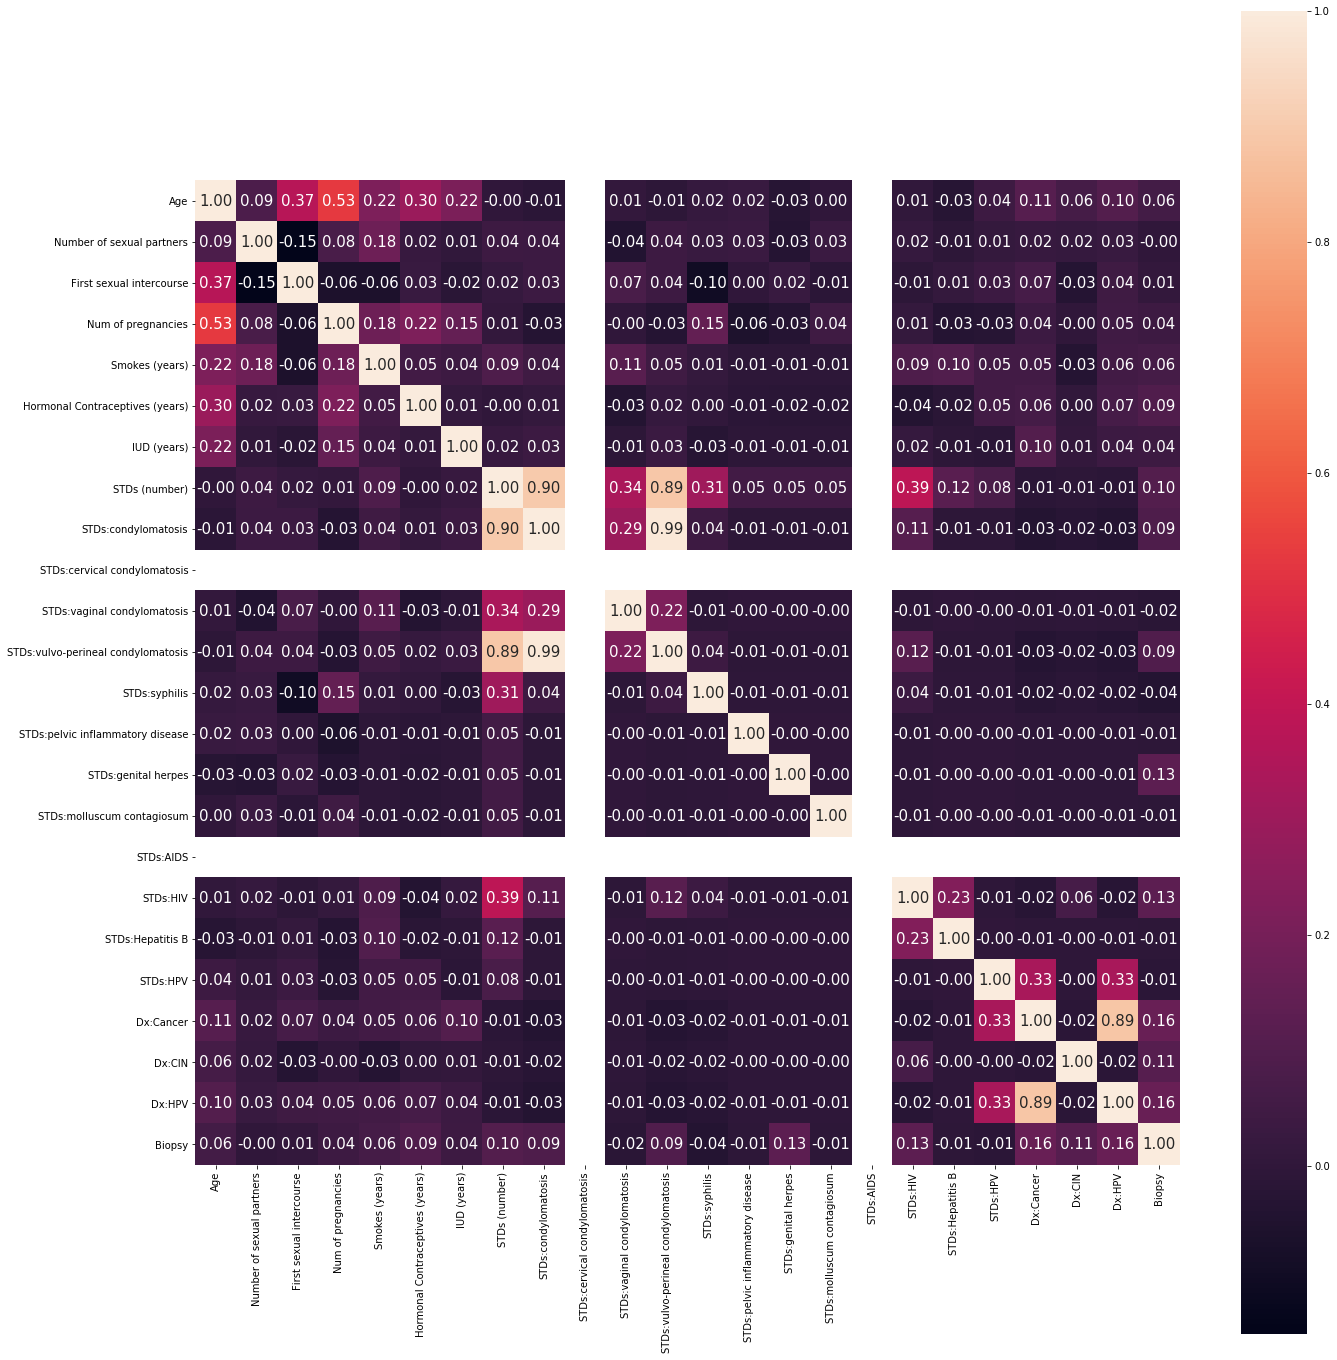

In [22]:
# Plot correlation matrix
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

cm = np.corrcoef(X.transpose(), y = y.transpose())

plt.figure(figsize=(20, 20))

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=df.columns,
                 xticklabels=df.columns)

plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

From this matrix, we observe the following pairs of features as strongly correlated (> 0.7):
 - Number of STDs and presence of Condylomatosis (0.90)
 - Number of STDs and presence of Vulvo-Perineal Condylomatosis (0.89)
 - Presence of Condylomatosis and presence of Vulvo-Perineal Condylomatosis (0.99)
 - Presence of Cancer and presence of HPV (0.89)

## Feature Selection
We use Scikit-learn's Random Forest feature selection method (from ExtraTreesClassifier) to determine most important features for our model.  Feature selection is important so we can remove features that do not have a strong impact on the result.

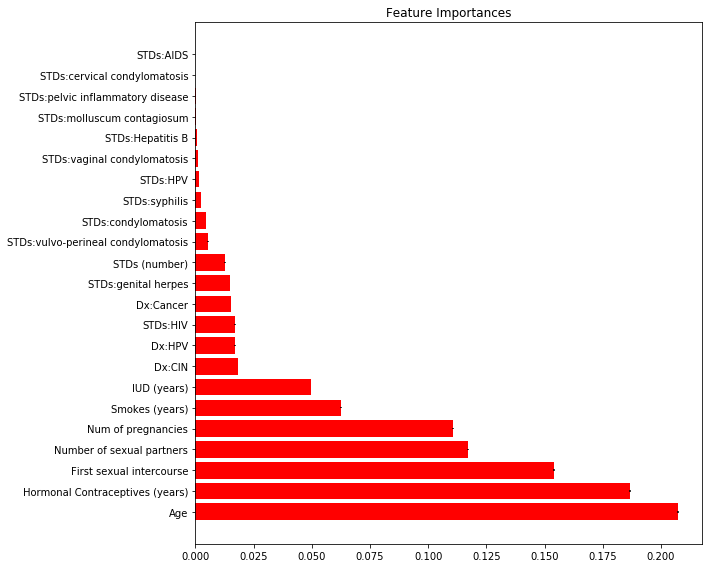

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

col = X.columns

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

colNew = []

for f in range(X.shape[1]):
    ind = indices[f]
    colNew.append(col[ind])
    
# Plot the feature importances of the forest
plt.figure(figsize=(10,8))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], tick_label=colNew,
       color="r", yerr=std[indices], align="center")
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

Looking at the plot above, the following features are the most important: 
- Age
- Years of using hormonal contraceptives
- Age of first sexual intercourse
- Number of sexual partners
- Number of pregnancies
- Years of smoking
- Years of using IUDs

There is a significant drop in importance after IUDs.  Therefore, we left the remaining variables out.

Also, we wanted to keep only one of pair of highly correlated features from above.  However, none of those features have a significant feature importance, so we do not need to deal with that any more here.

In [12]:
# Select the most important features (see list above)
X = X.iloc[:, 0:7]
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years)
0,18,4.0,15.0,1.0,0.0,0.0,0.0
1,15,1.0,14.0,1.0,0.0,0.0,0.0
2,34,1.0,17.0,1.0,0.0,0.0,0.0
3,52,5.0,16.0,4.0,37.0,3.0,0.0
4,46,3.0,21.0,4.0,0.0,15.0,0.0


In [13]:
y.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

## Oversampling
The data is imbalanced - there are much more negative biopsy results.  Therefore, we need to oversample the positive results.

In [14]:
# Oversample positive biopsy results
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X, y = ros.fit_sample(X, y)

In [15]:
pd.Series(y).value_counts()

1    803
0    803
dtype: int64

## Model Selection

### Dictionary of (Binary) Classifiers
- Logistic Regression
- Multi-layer Perceptron
- Decision Tree
- Random Forest
- Support Vector Machine
- KNN
- Naive Bayes

In [16]:
# Classifier name -> constructor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

### Dictionary of Pipelines for Chosen Classifiers

In [17]:
# Classifier name -> Pipeline
# Pipelines contain StandardScalar and the relevant classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

### Dictionary for Parameter Grids

In [18]:
# Classifier name -> parameter grids for given classifier
# Dictionary will be populated below
param_grids = {}

### Construct Parameter Grids for each Model

In [27]:
# Parameter Grid for Logistic Regression 
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid

In [28]:
# Parameter Grid for MLP
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid

In [29]:
# Parameter Grid for Decision Tree
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['dt'] = param_grid

In [30]:
# Parameter Grid for Random Forest
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

In [31]:
# Parameter Grid for SVC
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

param_grids['svc'] = param_grid

In [32]:
# Parameter Grid for KNN
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]

param_grids['knn'] = param_grid

In [33]:
# Parameter Grid for GNB
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]

param_grids['gnb'] = param_grid

### Hyperparameter Tuning
We use GridSearchCV to perform hyperparameter tuning. Specifically, for each set of parameters for each classifier, we use KFold cross-validation to determine an average accuracy score.  For each classifier, the best set of hyperparamters to fit a model on the full dataset.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# Iterate over classifiers
# Use GridSearchCV to find best hyperparmaters for each model
for name in pipe_clfs.keys():
    
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    
    # Fit classifier with all given combinations of parameters
    gs = gs.fit(X, y)
    
    # Update best_score_param_estimators with best parameters, score, and estimator for classifier
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

/Users/taishaferguson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/taishaferguson/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Best Models
We now have the best model for each classifier.  We print out this list of models, in descending order of accuracy (average accuracy from KFold validation above).

In [35]:
# Sort best_score_param_estimators in descending order of the best_score_ 

best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.9931506849315068, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.9713574097135741, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.9601494396014943, {'clf__n_neighbors': 1}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.8885429638854296, {'clf__C': 100, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}, <class 'sklearn.svm.classes.SVC'>]

[0.8437110834371109, {'clf__activation': 'relu', 'clf__hidden_layer_sizes': 200}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.5697384806973848, {'clf__var_smoothing': 1e-10}, <class 'sklearn.naive_bayes.GaussianNB'>]

[0.523038605230386, {'clf__C': 1, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]



The best model is a Random Forest, followed by a Decision Tree. 

We will now calculate the accuracy of the predictions produced by the Random Forest.

## Prediction and Evaluation

In [36]:
# Prediction on dataset with the best model
best_model = best_score_param_estimators[0][2]

y_pred = best_model.predict(X)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [37]:
# Compare predictions with actual results

# Since result is binary (1 or 0) we can use XOR to compare
# If result of XOR is 0, then the predicted and actual values matched
# If result of XOR is 0, then the predicted and actual values did not match
# So counting the non-zero results gives the numberr of incorrect predictions
incorrect = np.count_nonzero(np.logical_xor(y, y_pred))
correct = y_pred.shape[0] - incorrect
print("The chosen model predicted %d out of %d values correctly." % (correct, y_pred.shape[0]))

The chosen model predicted 1603 out of 1606 values correctly.


## Model Visualization
We are unable to provide a visualization for the full Random Forest since there are 30 trees.  Therefore, we selected one tree from the forest to display.

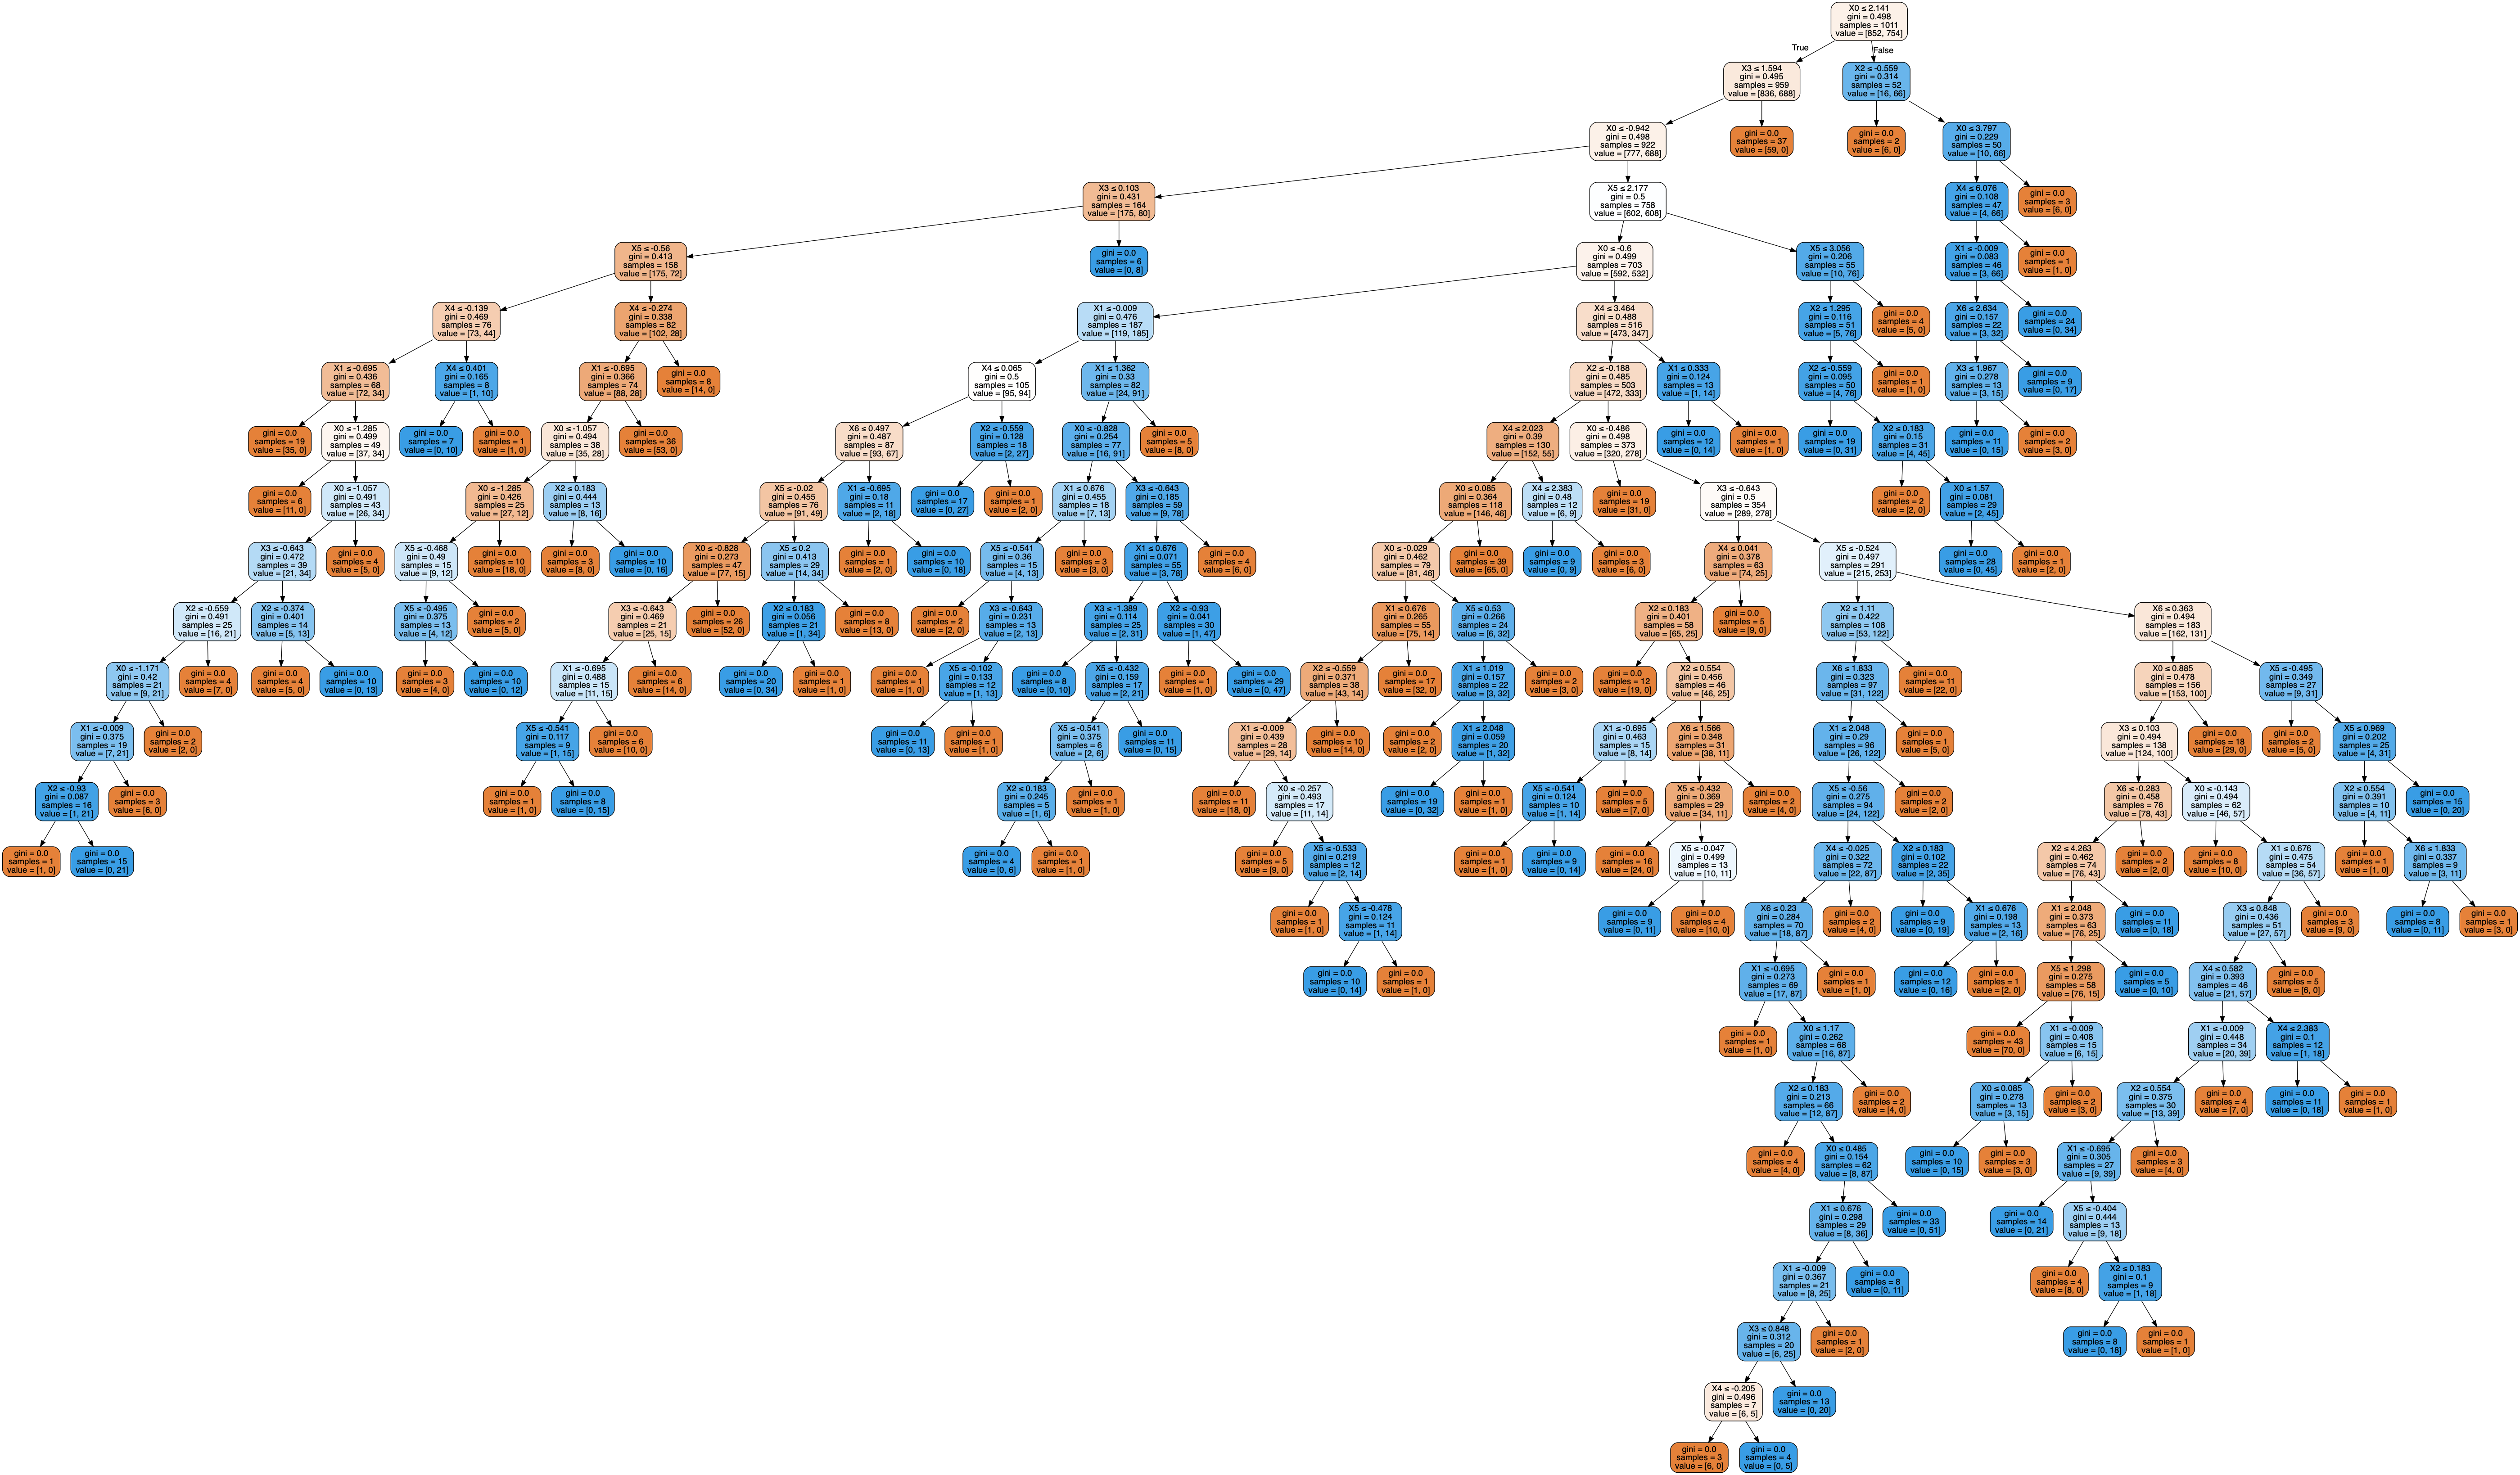

In [39]:
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
import pydotplus
from sklearn import tree
dot_data2 = StringIO()

tree_in_forest = best_score_param_estimators[0][2].named_steps['clf'].estimators_[0]
export_graphviz(tree_in_forest, out_file=dot_data2,
                filled=True,
                rounded=True,special_characters=True )

    
graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph.create_png())

## Conclusion
We determined that the following risk factors strongly affect the likelihood of cervical cancer: age, number of years of use of hormonal contraceptives, age of first sexual intercourse, number of sexual partners, number of pregnancies, number of years of smoking, and number of years of use of IUDs.  

Using these risk factors, we built a model that predicts biopsy results for cervical cancer with 99.32% accuracy.